# Lens Modelling for DESIJ2318-1106
### *Author(s): Rahul Dev Sharma, Nusrath Jahan*

In [4]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from lenstronomy.Data.coord_transforms import Coordinates
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Util import mask_util, util
from lenstronomy.Workflow.fitting_sequence import FittingSequence

%matplotlib inline

## Loading data from h5 Files

In [5]:
with h5py.File('DESIJ2318-1106_F140W.h5', 'r') as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
with h5py.File('psf_F140W.h5', 'r') as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()] 
kwargs_psf['psf_type'] = 'PIXEL'
# print(kwargs_data,kwargs_psf)

## Loading and Plotting the image data

<ipython-input-6-b810635bee55>:2: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data), origin='lower',


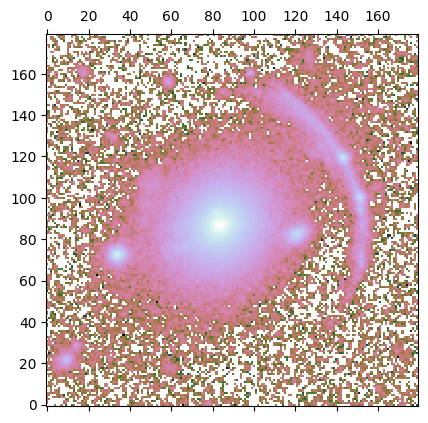

In [6]:
image_data = kwargs_data['image_data']
plt.matshow(np.log10(image_data), origin='lower',
            cmap='cubehelix');

## Creating Mask

180.0


<ipython-input-8-11e041eeb436>:106: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')
<ipython-input-8-11e041eeb436>:106: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')


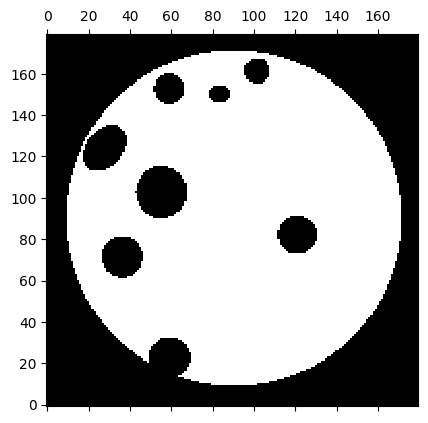

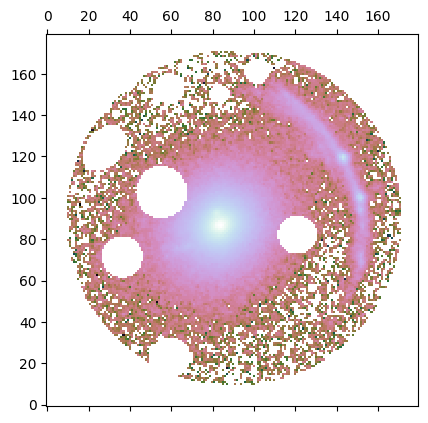

In [8]:
ra_at_xy_0 = kwargs_data['ra_at_xy_0']
dec_at_xy_0 = kwargs_data['dec_at_xy_0']
transform_pix2angle = kwargs_data['transform_pix2angle']

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data['image_data'])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

# print(x_coords)
# print(y_coords)
# print(num_pix)
r = 6.5 # arcsecond
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_center_2d(lens_center_ra,
                                      lens_center_dec,
                                      r,
                                      util.image2array(x_coords),
                                      util.image2array(y_coords))
# 12'o clock
mask_ext_1 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+0.55,
                                   lens_center_dec+4.8,
                                   0.4, 0.35, 0)
# 9.5'o clock
mask_ext_2 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+2.8,
                                   lens_center_dec+1,
                                   1, 1, np.pi/1.5)
# 6.5'o clock
mask_ext_11 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+2.5,
                                   lens_center_dec-5.4,
                                   .8, .8, np.pi/1.5)
# 8'o clock
mask_ext_4 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+4.33,
                                   lens_center_dec-1.5,
                                   .8, .8, np.pi/1.5)
# 2'o clock
mask_ext_5 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-4.35,
                                   lens_center_dec+2.3,
                                   0.7, 0.7, np.pi/1.5)
# 2.5'o clock
mask_ext_6 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-4.8,
                                   lens_center_dec+.88,
                                   0.7, 0.7, np.pi/1.5)
# 3.5'o clock
mask_ext_10 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-4.65,
                                   lens_center_dec-1.7,
                                   0.7, 0.7, np.pi/1.5)
# 3'o clock
mask_ext_3 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-2.45,
                                   lens_center_dec-0.648,
                                   0.75, 0.75, 0)
# 10'o clock
mask_ext_7 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+5,
                                   lens_center_dec+2.7,
                                   1, 0.7, np.pi/1.4)
# 11'o clock
mask_ext_8 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+2.5,
                                   lens_center_dec+5,
                                   0.6, 0.6, np.pi/1.5)
# 12.5'o clock
mask_ext_9 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-.89,
                                   lens_center_dec+5.7,
                                   0.5, 0.5, np.pi/1.5)

mask = (1 - mask_outer) *\
       (1 - mask_ext_1) *\
       (1 - mask_ext_2) *\
       (1 - mask_ext_7) *\
       (1 - mask_ext_8) *\
       (1 - mask_ext_9) *\
       (1 - mask_ext_3) *\
       (1 - mask_ext_11) *\
       (1 - mask_ext_4)

mask[mask >= 1] = 1
mask[mask < 0] = 0
print(np.sqrt(mask_outer.size))

mask = mask.reshape(180, 180)

plt.matshow(mask, origin='lower', cmap='cubehelix')
plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')

### Specifying the Model Names

In [12]:
lens_model_list = ['EPL', 'SHEAR']
source_model_list = ['SERSIC_ELLIPSE', 'SHAPELETS'] 
lens_light_model_list = ['SERSIC_ELLIPSE']

## Specifying initial, upper, lower values and sigma
In this cell below, we have to specify the initial values, upper and lower
limits for the model parameters specific to each of the model components
specified in the above lists. The `kwargs_*_sigma` dictionaries/lists are
used to set the initial size of the search area within particle swarm
optimization (PSO) or MCMC.

In [17]:
# lens galaxy's mass model

fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

# EPL Parameters

fixed_lens.append({})
kwargs_lens_init.append({'theta_E': 4.,
                        'gamma': 2.,
                        'e1': 0., 'e2': 0.,
                        'center_x': 0.,
                        'center_y': 0.})
kwargs_lens_sigma.append({'theta_E': .1,
                        'gamma': .1,
                        'e1': 0.05, 
                        'e2': 0.05,
                        'center_x': 0.5, 
                        'center_y': 0.5})
kwargs_lower_lens.append({'theta_E': 1., 
                        'gamma': 1., 
                        'e1': -0.5,
                        'e2': -0.5, 
                        'center_x': -10, 
                        'center_y': -10})
kwargs_upper_lens.append({'theta_E': 20., 
                        'gamma': 3., 
                        'e1': 0.5,
                        'e2': 0.5, 
                        'center_x': 10, 
                        'center_y': 10})

# SHEAR Parameters

fixed_lens.append({'ra_0': 0, 
                 'dec_0': 0})
kwargs_lens_init.append({'gamma1': 0., 
                        'gamma2': 0.})
kwargs_lens_sigma.append({'gamma1': 0.1, 
                        'gamma2': 0.1})
kwargs_lower_lens.append({'gamma1': -0.3, 
                        'gamma2': -0.3})
kwargs_upper_lens.append({'gamma1': 0.3, 
                        'gamma2': 0.3})


lens_params = [kwargs_lens_init, 
              kwargs_lens_sigma, 
              fixed_lens,
              kwargs_lower_lens, 
              kwargs_upper_lens]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})
kwargs_lens_light_init.append({'R_sersic': 0.5, 
                              'n_sersic': 2, 
                              'e1': 0,
                              'e2': 0, 
                              'center_x': 0., 
                              'center_y': 0,
                              'amp': 16})
kwargs_lens_light_sigma.append({'n_sersic': 1, 
                              'R_sersic': 0.3, 
                              'e1': 0.05, 
                              'e2': 0.05, 
                              'center_x': 0.1, 
                              'center_y': 0.1,
                              'amp': 10})
kwargs_lower_lens_light.append({'e1': -0.5, 
                              'e2': -0.5, 
                              'R_sersic': 0.001, 
                              'n_sersic': .5, 
                              'center_x': -10,
                              'center_y': -10, 
                              'amp': 0})
kwargs_upper_lens_light.append({'e1': 0.5, 
                              'e2': 0.5, 
                              'R_sersic': 10, 
                              'n_sersic': 5., 
                              'center_x': 10, 
                              'center_y': 10, 
                              'amp': 100})

joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [kwargs_lens_light_init, 
                    kwargs_lens_light_sigma,
                    fixed_lens_light, 
                    kwargs_lower_lens_light,
                    kwargs_upper_lens_light]


# source galaxy's light model

fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

# SERSIC_ELLIPSE parameters

fixed_source.append({'n_sersic': 1.})
kwargs_source_init.append({'R_sersic': 0.2, 
                         'n_sersic': 1, 
                         'e1': 0,
                         'e2': 0, 
                         'center_x': 0., 
                         'center_y': 0,
                         'amp': 16})
kwargs_source_sigma.append({'n_sersic': 0.5, 
                          'R_sersic': 0.5, 
                          'e1': 0.05,
                          'e2': 0.05,
                          'center_x': 0.2, 
                          'center_y': 0.2,
                          'amp': 10})
kwargs_lower_source.append({'e1': -0.5, 
                          'e2': -0.5, 
                          'R_sersic': 0.001,
                          'n_sersic': .5, 
                          'center_x': -10, 
                          'center_y': -10,
                          'amp': 0})
kwargs_upper_source.append({'e1': 0.5, 
                          'e2': 0.5, 
                          'R_sersic': 1, 
                          'n_sersic': 5., 
                          'center_x': 10, 
                          'center_y': 10,
                          'amp': 100})


# SHAPELETS parameters

fixed_source.append({'n_max': 5}) 
kwargs_source_init.append({'beta': 0.5, 
                         'center_x': 0, 
                         'center_y': 0}) 
kwargs_source_sigma.append({'beta': 0.1, 
                          'center_x': 0.2, 
                          'center_y': 0.2}) 
kwargs_lower_source.append({'beta': 0, 
                          'center_x': -10, 
                          'center_y': -10}) 
kwargs_upper_source.append({'beta': 1., 
                          'center_x': 10, 
                          'center_y': 10})  

source_params = [kwargs_source_init, 
                kwargs_source_sigma, 
                fixed_source,
                kwargs_lower_source, 
                kwargs_upper_source]

joint_shapelets_with_sersic = [[0, 1, ["center_x", "center_y"]]]

# combining all the above specification in the `kwargs_params` dictionary
kwargs_params ={"lens_model": lens_params,
               "source_model": source_params,
               "lens_light_model": lens_light_params,
}

kwargs_constraints = {"joint_lens_with_light": joint_lens_with_light,
                     "joint_source_with_source": joint_shapelets_with_sersic,
}

#### Numerical settings

No need to change anything here for now. It's also fine to not
understand these settings for now.

In [18]:
kwargs_likelihood = {'check_bounds': True,
                    'image_likelihood_mask_list': [mask]}

kwargs_numerics = {'supersampling_factor': 1,
                   'supersampling_convolution': False
                   }

#### Combining all the information to be sent to lenstronomy

In [19]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                     # 'multi-linear': every imaging band
                     # has independent solutions of the 
                     # surface brightness, 'joint-linear': 
                     # there is one joint solution of the 
                     # linear coefficients demanded across the bands.
                    }

## Here the model fiting is done

In [20]:
fitting_seq = FittingSequence(kwargs_data_joint, 
                              kwargs_model, 
                              kwargs_constraints, 
                              kwargs_likelihood,
                              kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 
                                'n_particles': 200,
                                'n_iterations': 100}]]


chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-2.518853463994442 reduced X^2 of best position
-23446.747469592265 log likelihood
18617 effective number of data points
[{'theta_E': 4.121551596036365, 'gamma': 1.9086442880468637, 'e1': 0.004065772563591599, 'e2': -0.05887072224291621, 'center_x': 0.540138267964731, 'center_y': -0.259264604984555}, {'gamma1': -0.05344217010823691, 'gamma2': 0.11017563595919322, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.9999392333412528, 'n_sersic': 1.0, 'e1': 0.1872208376794413, 'e2': -0.13550236217631853, 'center_x': -0.7127063053791358, 'center_y': 0.5373157158834779}, {'amp': 1, 'n_max': 5, 'beta': 0.173341658269152, 'center_x': -0.7127063053791358, 'center_y': 0.5373157158834779}] source result
[{'amp': 1, 'R_sersic': 0.9616286949991375, 'n_sersic': 4.0, 'e1': 0.004065772563591599, 'e2': -0.05887072224291621, 'center_x': 0.540138267964731, 'center_y': -0.259264604984555}] lens light result
[]

## Visualizing the fitted model

-2.513722591218683 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.513722591218682


/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
<ipython-input-21-2ce554897d0f>:26: UserWarning: Tight la

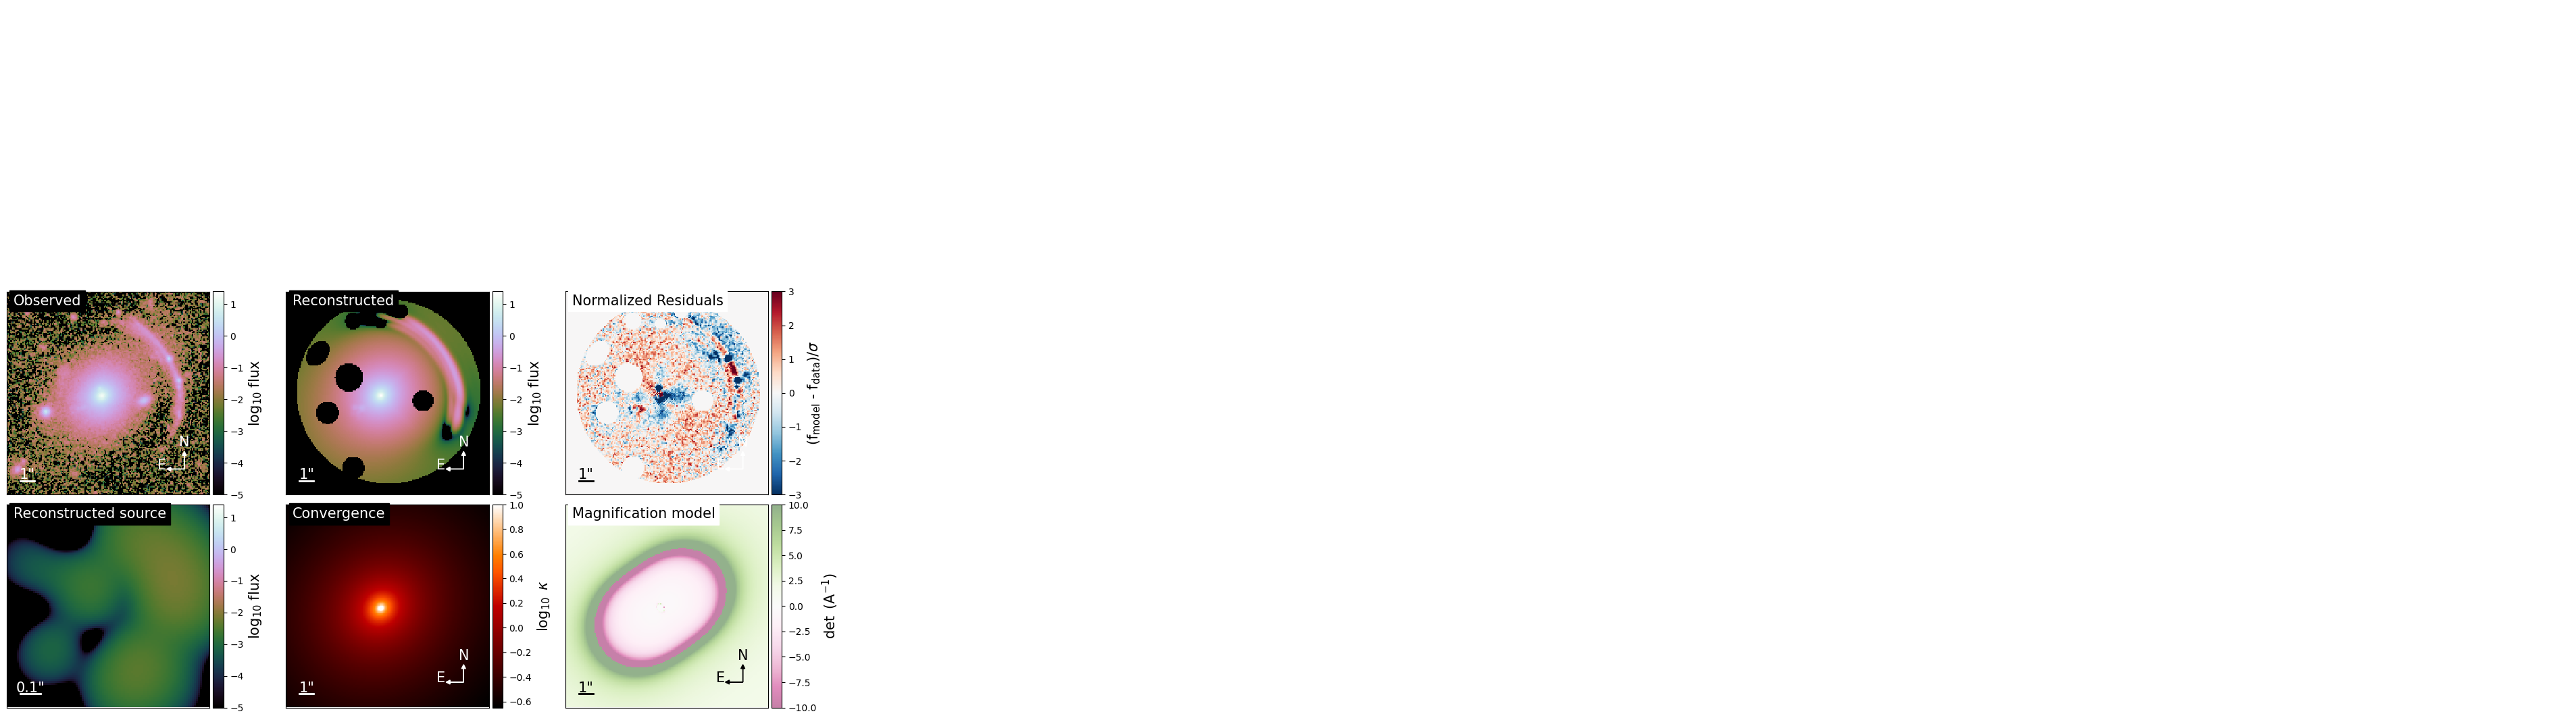

In [21]:
model_plot = ModelPlot(multi_band_list, 
                       kwargs_model, 
                       kwargs_result,
                       arrow_size=0.02, 
                       cmap_string="cubehelix",
                       image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"]
                      )

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False,
                       sharey=False)

model_plot.data_plot(ax=axes[0,0])
model_plot.model_plot(ax=axes[0,1])
model_plot.normalized_residual_plot(ax=axes[0,2], 
                                    v_min=-3, 
                                    v_max=3,
                                    cmap='RdBu_r')
model_plot.source_plot(ax=axes[1, 0], 
                       deltaPix_source=0.01, 
                       numPix=100)
model_plot.convergence_plot(ax=axes[1, 1], 
                            v_max=1, 
                            cmap='gist_heat')
model_plot.magnification_plot(ax=axes[1, 2], 
                              cmap='PiYG')
f.tight_layout()
f.subplots_adjust(left=None, 
                  bottom=None, 
                  right=None, 
                  top=None, 
                  wspace=0., 
                  hspace=0.05)
plt.show()


/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:511: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


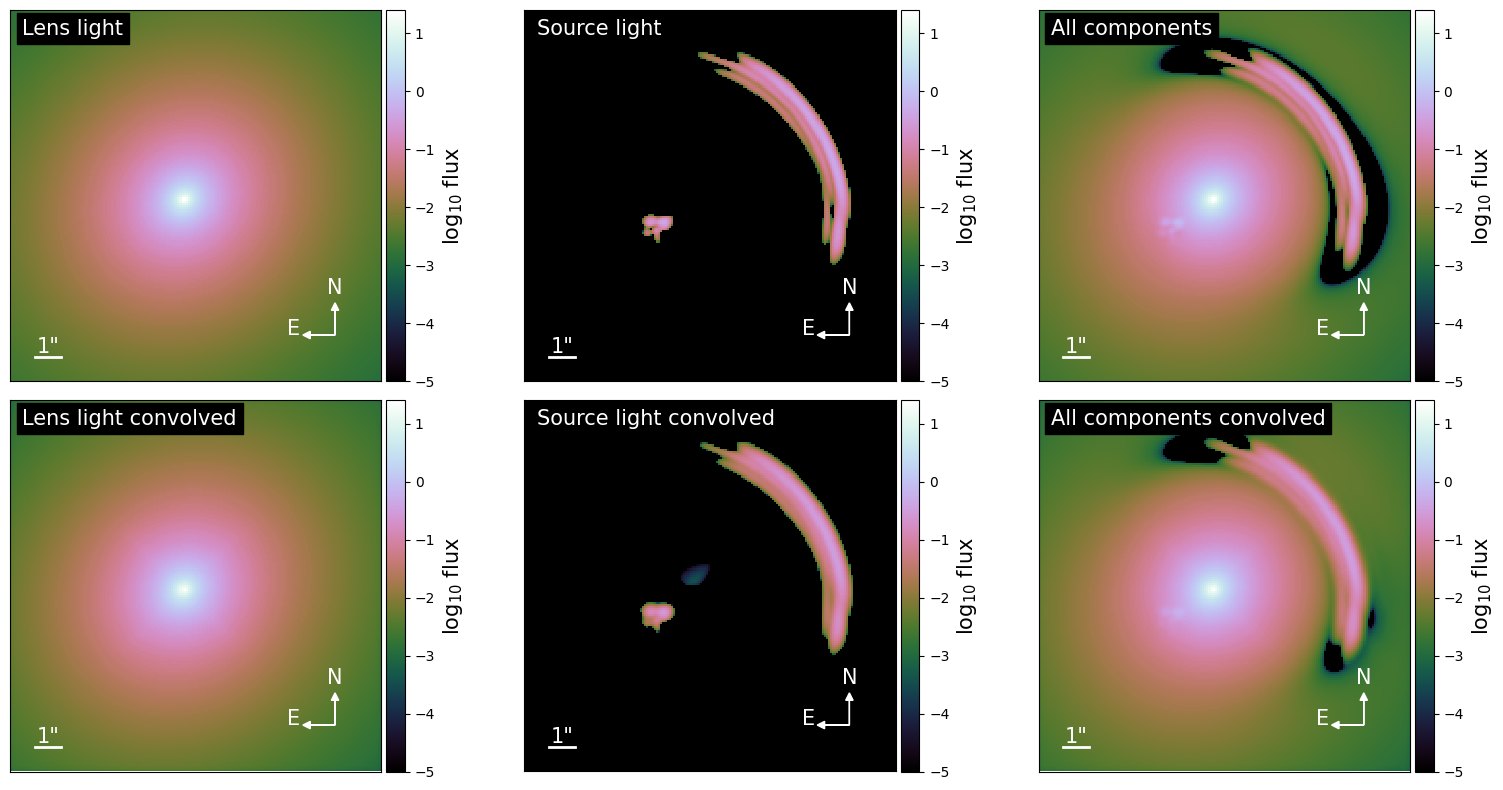

{'kwargs_lens': [{'theta_E': 4.121551596036365, 'gamma': 1.9086442880468637, 'e1': 0.004065772563591599, 'e2': -0.05887072224291621, 'center_x': 0.540138267964731, 'center_y': -0.259264604984555}, {'gamma1': -0.05344217010823691, 'gamma2': 0.11017563595919322, 'ra_0': 0, 'dec_0': 0}], 'kwargs_source': [{'amp': -1.431417525738054, 'R_sersic': 0.9999392333412528, 'n_sersic': 1.0, 'e1': 0.1872208376794413, 'e2': -0.13550236217631853, 'center_x': -0.7127063053791358, 'center_y': 0.5373157158834779}, {'amp': array([ 72.78940206, -51.13915302,  15.84384709,  68.4155005 ,
       -18.58101104,  49.34316609, -44.6662727 ,  23.97948868,
       -43.959251  , -10.91370648,  25.31219509, -25.92441379,
        22.60256693,  -5.35419484,  18.75585112,  -5.9751967 ,
        14.44738985,   5.86351249,  -0.59366311, -19.61499591,
        -0.96038415]), 'n_max': 5, 'beta': 0.173341658269152, 'center_x': -0.7127063053791358, 'center_y': 0.5373157158834779}], 'kwargs_lens_light': [{'amp': 114.9238206326569

In [22]:

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(ax=axes[0,0], 
                              text='Lens light', 
                              lens_light_add=True, 
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,0], 
                              text='Lens light convolved',
                              lens_light_add=True)
model_plot.decomposition_plot(ax=axes[0,1], 
                              text='Source light',
                              source_add=True, 
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,1], 
                              text='Source light convolved',
                              source_add=True)
model_plot.decomposition_plot(ax=axes[0,2], 
                              text='All components', 
                              source_add=True, 
                              lens_light_add=True,
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,2], 
                              text='All components convolved',
                              source_add=True, 
                              lens_light_add=True,
                              point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, 
                  bottom=None, 
                  right=None, 
                  top=None,
                  wspace=0., 
                  hspace=0.05)
plt.show()
print(kwargs_result)